<a href="https://colab.research.google.com/github/Rajeeb321123/Machine-learning-Journey/blob/master/19_upper_confidence_bound_reinforcement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [40]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [41]:
import math
N = 10000 #total no of users or rounds # this N should be decrease in for increaing quickness later no
d = 10 # total no of ads
ads_selected = [] # full list adds_selected (with highest upperbound in each round. 1 round 1 ad select) start at empty list -get bigger  and bigger over the rounds
numbers_of_selections = [0] * d # [0,0,0,0,0,0,0,0,0,0] # no of selection in each position is for each ads selections by users/ or in each rounds
sums_of_rewards = [0] * d # [0,0,0,0,0,0,0,0,0,0] for each ads in each position 0 to 9
print(sums_of_rewards[2])
total_reward = 0 # in first round no reward selected
average_reward = 0 # in video mistake. this need initialization otherwise error will occur

for n in range(0, N): # for each round or user
  print(f" User/round number: {n}")
  ad = 0
  max_upper_bound = 0 # initial and reinitialize with 0 in begining of each round. replace if it with new if higher value
  for i in range(0, d): # for each ads for each user (double for loop)
    print(f"advertisement number: {i}")
    if (numbers_of_selections[i] > 0): # if > 0 means: add already selected at least one or value is 1 not 0
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      print(f'average_reward in user/round({n}) and adverdisement({i}): {average_reward}')

      # confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1)/ numbers_of_selections[i]) # n cant be zero => inifinity so n+1

      upper_bound = average_reward + delta_i
      print(f"upperbound in user/round({n}) and adverdisement({i})::{upper_bound}")

    # if this particluar at postion i hasn't been selected in any rounds / by users yet
    else: # we must select ads that hasn't been selected yet. numbers_of_selection[i], here i =0,1,2,3,4 representing each ads selected by different user/rounds.
      #numbers_of_selection[i] shouldn't be zero otherwise we will never get inside if clause above and inturn calculate average_reward
      upper_bound = 1e400 # super high value almost infinity
      print(f"{i} in {n}, upperBound:{upper_bound}")

    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i # i is for each
      print(f"Inside if (upper_bound > max_upper_bound): for user/round({n}) advertisement({i})")

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  print(f"Selected advertisement at round/user({n}): {ad}")
  reward = dataset.values[n, ad] #[row, column] # sum of reward for each ad
  print(f"reward at round/user({n}) and selected_advertisment({ad}): {sums_of_rewards}")
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  print(f"final sum_of_rewards at round/user({n}): {sums_of_rewards}")
  total_reward= total_reward + reward # for all ad, rewads cummulated
  print(f"final total_reward at round/user({n}): {total_reward} \n\n\n\n")


Streaming output truncated to the last 5000 lines.
advertisement number: 2
average_reward in user/round(1759) and adverdisement(2): 0.013333333333333334
upperbound in user/round(1759) and adverdisement(2)::0.39993568945735375
Inside if (upper_bound > max_upper_bound): for user/round(1759) advertisement(2)
advertisement number: 3
average_reward in user/round(1759) and adverdisement(3): 0.07476635514018691
upperbound in user/round(1759) and adverdisement(3)::0.3984369450411022
advertisement number: 4
average_reward in user/round(1759) and adverdisement(4): 0.2661290322580645
upperbound in user/round(1759) and adverdisement(4)::0.400590944553489
Inside if (upper_bound > max_upper_bound): for user/round(1759) advertisement(4)
advertisement number: 5
average_reward in user/round(1759) and adverdisement(5): 0.013333333333333334
upperbound in user/round(1759) and adverdisement(5)::0.39993568945735375
advertisement number: 6
average_reward in user/round(1759) and adverdisement(6): 0.1111111111

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
advertisement number: 6
average_reward in user/round(4632) and adverdisement(6): 0.1004566210045662
upperbound in user/round(4632) and adverdisement(6)::0.34090369155384626
advertisement number: 7
average_reward in user/round(4632) and adverdisement(7): 0.19838709677419356
upperbound in user/round(4632) and adverdisement(7)::0.34129153037279486
advertisement number: 8
average_reward in user/round(4632) and adverdisement(8): 0.09
upperbound in user/round(4632) and adverdisement(8)::0.34160921910896835
advertisement number: 9
average_reward in user/round(4632) and adverdisement(9): 0.0364963503649635
upperbound in user/round(4632) and adverdisement(9)::0.3405017266635258
Selected advertisement at round/user(4632): 4
reward at round/user(4632) and selected_advertisment(4): [58, 33, 3, 31, 625, 1, 22, 123, 18, 5]
final sum_of_rewards at round/user(4632): [58, 33, 3, 31, 626, 1, 22, 123, 18, 5]
final total_reward at round/user(4632): 920 



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.


 User/round number: 9881
advertisement number: 0
average_reward in user/round(9881) and adverdisement(0): 0.1702127659574468
upperbound in user/round(9881) and adverdisement(0)::0.3101099181451339
Inside if (upper_bound > max_upper_bound): for user/round(9881) advertisement(0)
advertisement number: 1
average_reward in user/round(9881) and adverdisement(1): 0.12144702842377261
upperbound in user/round(9881) and adverdisement(1)::0.3102670095407464
Inside if (upper_bound > max_upper_bound): for user/round(9881) advertisement(1)
advertisement number: 2
average_reward in user/round(9881) and adverdisement(2): 0.03763440860215054
upperbound in user/round(9881) and adverdisement(2)::0.30999668808580044
advertisement number: 3
average_reward in user/round(9881) and adverdisement(3): 0.11014492753623188
upperbound in user/round(9881) and adverdisement(3)::0.31012829857759683
advertisement number: 4
average_reward in user/round(9881) and adve

## Visualizing the results

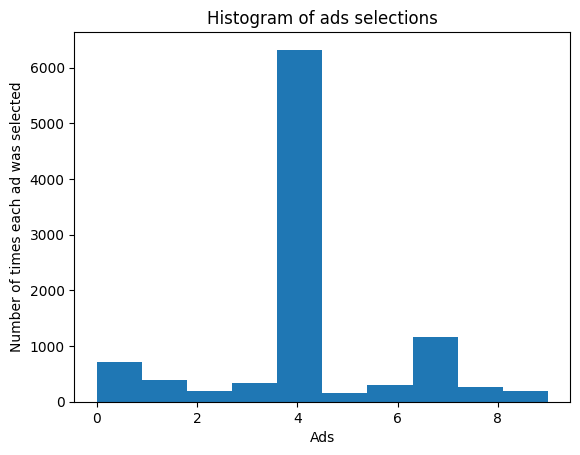

In [42]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel("Number of times each ad was selected")
plt.show()
# looks like best advertisement is 4

## Increasing Quickness

Decreaseing no of rounds and can our model still recognize 4 as best model
1. 10000 to 5000
2. 5000 to 1000 : seem like 1000 is our UCB model limit
3. 1000 t0 500

Seems like our UCB model can recognize up to 1000 rounds but
for 500 round it failed.


**In Next Algorithm:**

Can Thomson Sampling beat UCB interms of can thomson Sampling can find 4 (real answer) in just 500 rounds(where UCB failed) ?

0


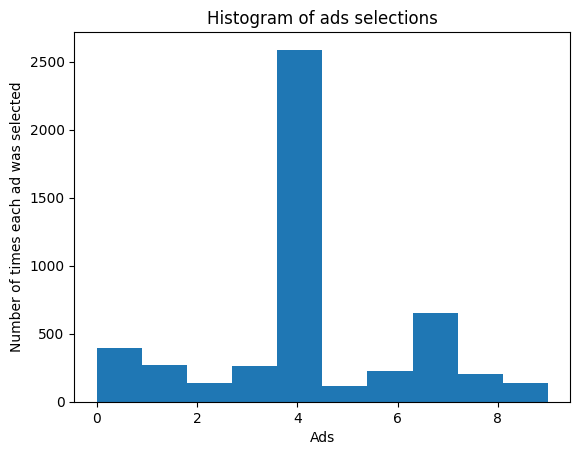

In [43]:
# 5000 rounds
import math
N = 5000 #total no of users or rounds 10000 t0 5000
d = 10 # total no of ads
ads_selected = [] # full list adds_selected (with highest upperbound in each round. 1 round 1 ad select) start at empty list -get bigger  and bigger over the rounds
numbers_of_selections = [0] * d # [0,0,0,0,0,0,0,0,0,0] # no of selection in each position is for each ads selections by users/ or in each rounds
sums_of_rewards = [0] * d # [0,0,0,0,0,0,0,0,0,0] for each ads in each position 0 to 9
print(sums_of_rewards[2])
total_reward = 0 # in first round no reward selected
average_reward = 0 # in video mistake. this need initialization otherwise error will occur

for n in range(0, N): # for each round or user
  ad = 0
  max_upper_bound = 0 # initial and reinitialize with 0 in begining of each round. replace if it with new if higher value
  for i in range(0, d): # for each ads for each user (double for loop)
    if (numbers_of_selections[i] > 0): # if > 0 means: add already selected at least one or value is 1 not 0
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]

      # confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1)/ numbers_of_selections[i]) # n cant be zero => inifinity so n+1

      upper_bound = average_reward + delta_i

    # if this particluar at postion i hasn't been selected in any rounds / by users yet
    else: # we must select ads that hasn't been selected yet. numbers_of_selection[i], here i =0,1,2,3,4 representing each ads selected by different user/rounds.
      #numbers_of_selection[i] shouldn't be zero otherwise we will never get inside if clause above and inturn calculate average_reward
      upper_bound = 1e400 # super high value almost infinity

    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i # i is for each

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad] #[row, column] # sum of reward for each ad
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward= total_reward + reward # for all ad, rewads cummulated


# Plot
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel("Number of times each ad was selected")
plt.show()
# still looks like best advertisement is 4

0


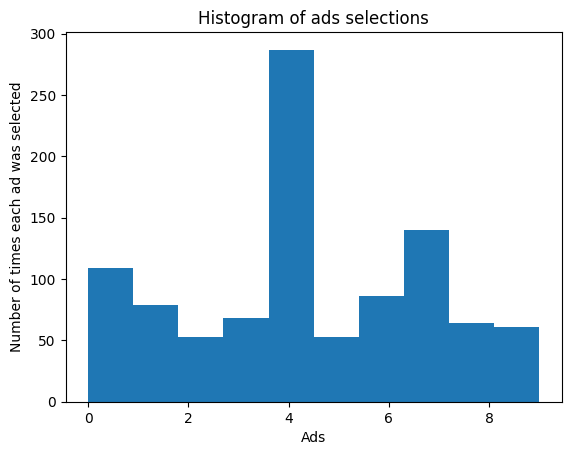

In [44]:
# 1000 rounds
import math
N = 1000 #total no of users or rounds 10000 t0 5000
d = 10 # total no of ads
ads_selected = [] # full list adds_selected (with highest upperbound in each round. 1 round 1 ad select) start at empty list -get bigger  and bigger over the rounds
numbers_of_selections = [0] * d # [0,0,0,0,0,0,0,0,0,0] # no of selection in each position is for each ads selections by users/ or in each rounds
sums_of_rewards = [0] * d # [0,0,0,0,0,0,0,0,0,0] for each ads in each position 0 to 9
print(sums_of_rewards[2])
total_reward = 0 # in first round no reward selected
average_reward = 0 # in video mistake. this need initialization otherwise error will occur

for n in range(0, N): # for each round or user
  ad = 0
  max_upper_bound = 0 # initial and reinitialize with 0 in begining of each round. replace if it with new if higher value
  for i in range(0, d): # for each ads for each user (double for loop)
    if (numbers_of_selections[i] > 0): # if > 0 means: add already selected at least one or value is 1 not 0
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]

      # confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1)/ numbers_of_selections[i]) # n cant be zero => inifinity so n+1

      upper_bound = average_reward + delta_i

    # if this particluar at postion i hasn't been selected in any rounds / by users yet
    else: # we must select ads that hasn't been selected yet. numbers_of_selection[i], here i =0,1,2,3,4 representing each ads selected by different user/rounds.
      #numbers_of_selection[i] shouldn't be zero otherwise we will never get inside if clause above and inturn calculate average_reward
      upper_bound = 1e400 # super high value almost infinity

    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i # i is for each

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad] #[row, column] # sum of reward for each ad
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward= total_reward + reward # for all ad, rewads cummulated


# Plot
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel("Number of times each ad was selected")
plt.show()
# still looks like best advertisement is 4

0


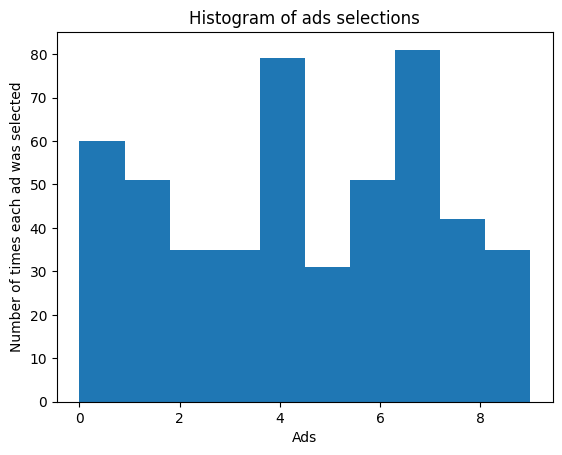

In [45]:
# 500 rounds
import math
N = 500 #total no of users or rounds 10000 t0 5000
d = 10 # total no of ads
ads_selected = [] # full list adds_selected (with highest upperbound in each round. 1 round 1 ad select) start at empty list -get bigger  and bigger over the rounds
numbers_of_selections = [0] * d # [0,0,0,0,0,0,0,0,0,0] # no of selection in each position is for each ads selections by users/ or in each rounds
sums_of_rewards = [0] * d # [0,0,0,0,0,0,0,0,0,0] for each ads in each position 0 to 9
print(sums_of_rewards[2])
total_reward = 0 # in first round no reward selected
average_reward = 0 # in video mistake. this need initialization otherwise error will occur

for n in range(0, N): # for each round or user
  ad = 0
  max_upper_bound = 0 # initial and reinitialize with 0 in begining of each round. replace if it with new if higher value
  for i in range(0, d): # for each ads for each user (double for loop)
    if (numbers_of_selections[i] > 0): # if > 0 means: add already selected at least one or value is 1 not 0
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]

      # confidence_interval
      delta_i = math.sqrt(3/2 * math.log(n+1)/ numbers_of_selections[i]) # n cant be zero => inifinity so n+1

      upper_bound = average_reward + delta_i

    # if this particluar at postion i hasn't been selected in any rounds / by users yet
    else: # we must select ads that hasn't been selected yet. numbers_of_selection[i], here i =0,1,2,3,4 representing each ads selected by different user/rounds.
      #numbers_of_selection[i] shouldn't be zero otherwise we will never get inside if clause above and inturn calculate average_reward
      upper_bound = 1e400 # super high value almost infinity

    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i # i is for each

  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad] #[row, column] # sum of reward for each ad
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward= total_reward + reward # for all ad, rewads cummulated


# Plot
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel("Number of times each ad was selected")
plt.show()
# looks like best advertisement is 6.5 but this is wrong as we know our answer must be 4.
# So our UCB model can only predict with 1000 rounds, anything less than that will cause massive error like here.